In [1]:
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings("ignore")

Metadata: <br>
"timestamp" - timestamp field for grouping the data <br>
"cnt" - the count of a new bike shares <br>
"t1" - real temperature in C <br>
"t2" - temperature in C "feels like" <br>
"hum" - humidity in percentage <br>
"windspeed" - wind speed in km/h <br>
"weathercode" - category of the weather <br>
"isholiday" - boolean field - 1 holiday / 0 non holiday <br>
"isweekend" - boolean field - 1 if the day is weekend <br>
"season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter. <br>

"weathe_code" category description: <br>
1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 2 = scattered clouds / few clouds 3 = Broken clouds 4 = Cloudy 7 = Rain/ light Rain shower/ Light rain 10 = rain with thunderstorm 26 = snowfall 94 = Freezing Fog

In [3]:
df = pd.read_csv('E:\kaggle\london_merged.csv')

In [4]:
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [5]:
# check if there are any null values
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [6]:
df.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

(array([8.274e+03, 4.416e+03, 2.355e+03, 1.241e+03, 5.610e+02, 4.710e+02,
        8.800e+01, 2.000e+00, 3.000e+00, 3.000e+00]),
 array([   0.,  786., 1572., 2358., 3144., 3930., 4716., 5502., 6288.,
        7074., 7860.]),
 <BarContainer object of 10 artists>)

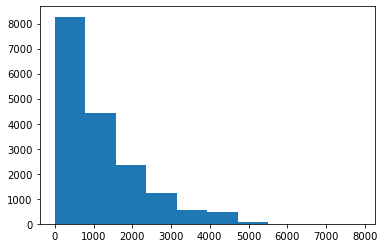

In [8]:
# histogram of cnt
plt.hist(df.cnt)

Text(0.5, 1.05, 'Distribution of number of new bike share')

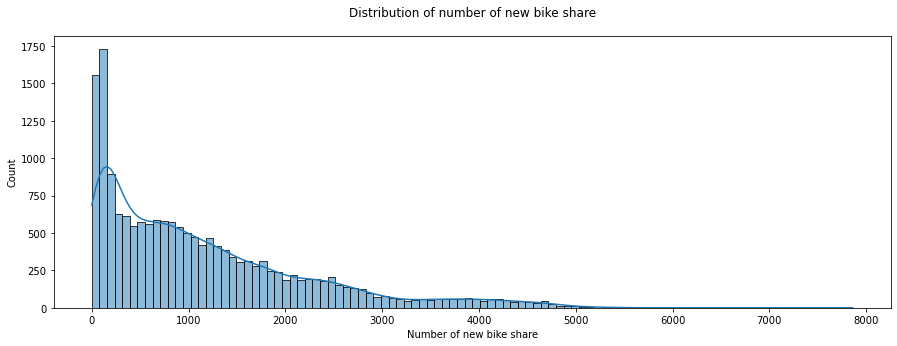

In [9]:
plt.figure(figsize=(15,5))
sns.histplot(data = df, x = 'cnt',bins=100,kde=True)
plt.ylabel('Count')
plt.xlabel('Number of new bike share')
plt.title('Distribution of number of new bike share', y=1.05)

<AxesSubplot:xlabel='cnt'>

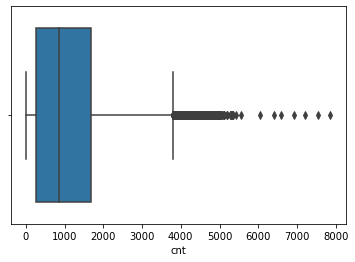

In [10]:
sns.boxplot(data=df,x='cnt')

In [11]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

<AxesSubplot:xlabel='timestamp', ylabel='cnt'>

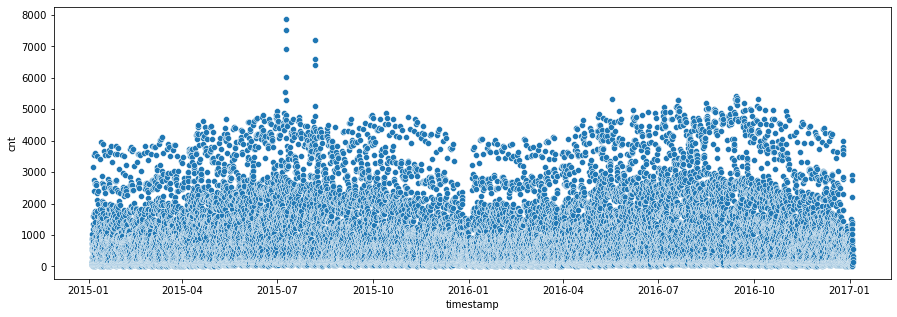

In [12]:
plt.figure(figsize = (15,5))
sns.scatterplot(data = df, x = df['timestamp'], y = df['cnt'],)

Text(0.5, 1.05, 'Number of bike share each day')

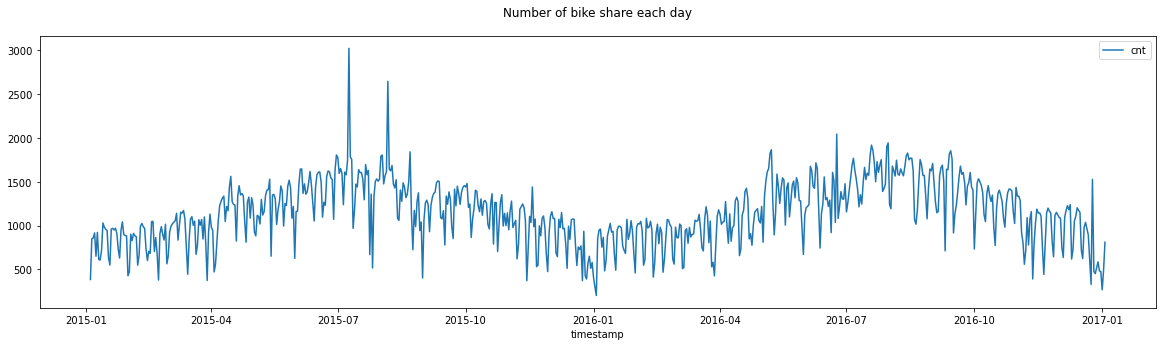

In [13]:
plt.figure(figsize=(20,5))
sns.lineplot(data = df.groupby([df['timestamp'].dt.date]).agg({'cnt':'mean'}))
plt.title('Number of bike share each day',y=1.05)

# How weekends affect number of bikeshare

In [14]:
df.weekends = df.loc[:,['timestamp','cnt','is_weekend']].copy()
df.weekends

,timestamp,cnt,is_weekend
0,2015-01-04 00:00:00,182,1.0
1,2015-01-04 01:00:00,138,1.0
2,2015-01-04 02:00:00,134,1.0
3,2015-01-04 03:00:00,72,1.0
4,2015-01-04 04:00:00,47,1.0
...,...,...,...
17409,2017-01-03 19:00:00,1042,0.0
17410,2017-01-03 20:00:00,541,0.0
17411,2017-01-03 21:00:00,337,0.0
17412,2017-01-03 22:00:00,224,0.0


In [15]:
df.weekends_01 = df.weekends.set_index('timestamp').groupby(pd.Grouper(freq='1D')).agg({'cnt':sum,'is_weekend':'mean'})

Text(0.5, 1.05, 'Total number of bikeshare over time')

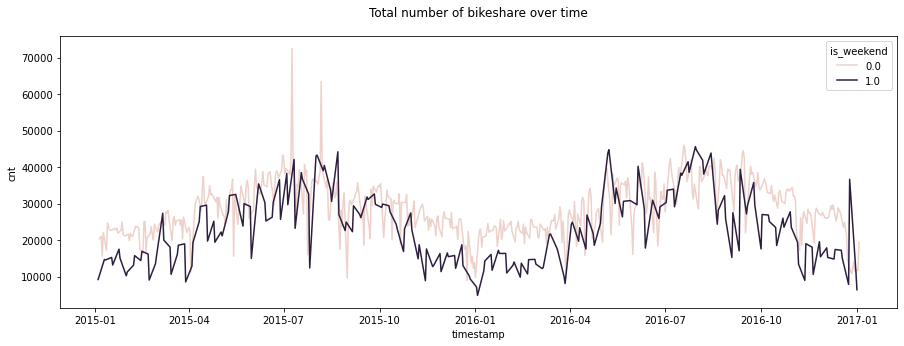

In [16]:
plt.figure(figsize = (15,5))
sns.lineplot(data = df.weekends_01 , x = 'timestamp', y = 'cnt',hue='is_weekend')
plt.title('Total number of bikeshare over time',y=1.05)

# Wind speed and number of bike share

<AxesSubplot:xlabel='wind_speed', ylabel='cnt'>

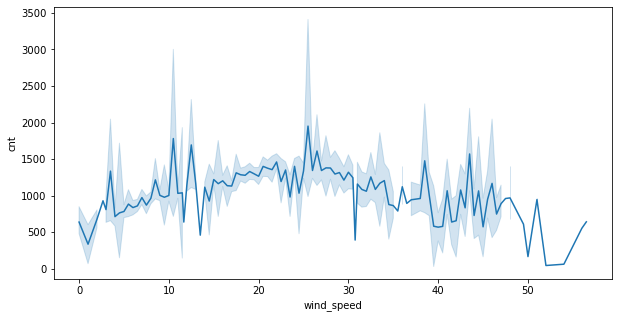

In [17]:
plt.figure(figsize=(10,5))
sns.lineplot(data = df,x='wind_speed',y='cnt')

# Weather 

1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 2 = scattered clouds / few clouds 3 = Broken clouds 4 = Cloudy 7 = Rain/ light Rain shower/ Light rain 10 = rain with thunderstorm 26 = snowfall 94 = Freezing Fog

<AxesSubplot:xlabel='weather_code', ylabel='cnt'>

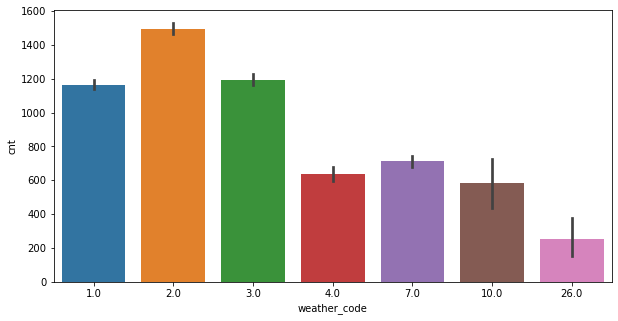

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='weather_code',y='cnt')

# Season
"season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter. <br>


Text(0.5, 1.05, 'Number of bike share by season')

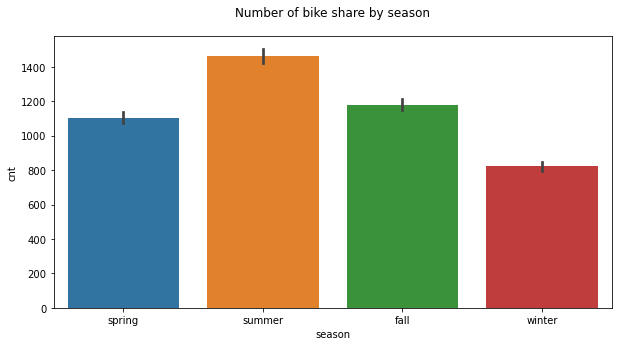

In [19]:
plt.figure(figsize=(10,5))
g = sns.barplot(data=df,x='season',y='cnt')
# g.set_xticks(['spring','summer','fall','winter'])
# g.set_xticks(range(len(s_x)+1))
g.set_xticklabels(['spring','summer','fall','winter'])
plt.title('Number of bike share by season',y=1.05)

# Humidity

Text(0.5, 1.05, 'Humidity and number of bike share')

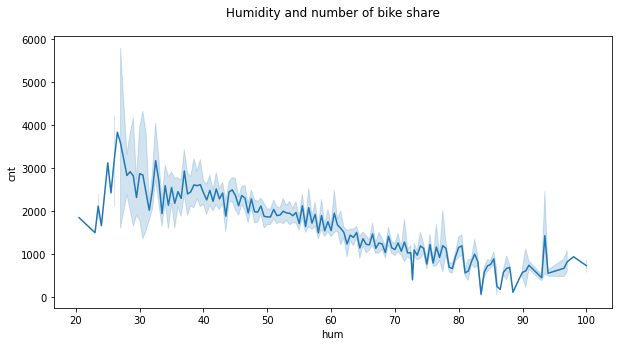

In [20]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x='hum',y='cnt')
plt.title('Humidity and number of bike share',y=1.05)

# Temperature

### Are there any difference between t1 and t2

In [24]:
# resampling by day
df_day = df.set_index('timestamp').resample("D").mean()
df_day.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04,384.750000,2.479167,0.645833,94.270833,7.500000,2.875000,0.0,1.0,3.0
2015-01-05,848.833333,8.041667,6.708333,80.312500,8.854167,3.333333,0.0,0.0,3.0
2015-01-06,858.875000,7.854167,5.333333,78.895833,16.000000,3.083333,0.0,0.0,3.0
2015-01-07,915.826087,7.456522,4.500000,78.108696,19.760870,2.608696,0.0,0.0,3.0
2015-01-08,650.041667,9.750000,7.791667,79.312500,20.479167,3.500000,0.0,0.0,3.0


Text(0.5, 1.0, 'Number of bike share over temperature t2')

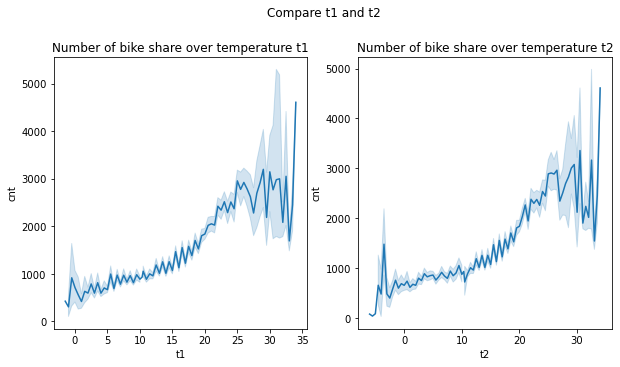

In [31]:
# subplot

fig, ax  = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Compare t1 and t2',y=1.02)
sns.lineplot(ax=ax[0],data = df, x = 't1', y= 'cnt')
sns.lineplot(ax=ax[1],data = df, x = 't2', y= 'cnt')
ax[0].set_title('Number of bike share over temperature t1')
ax[1].set_title('Number of bike share over temperature t2')



In [21]:
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0
